Estimating the chance of bankruptcy from qualitative parameters by experts

SUPERVISED LEARNING

Recommended Use: Classification Models

Domain: Finance/Banking

In [1]:
#loading libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading data
data = pd.read_csv(r'C:\Users\OLAMIDE\Desktop\MACHINE_LEARNING_PROJECTS\Qualitative_Bankruptcy.csv',header=None)
data.shape

(250, 7)

In [3]:
#column names for various colunms of the data
columns_names = ['Industrial Risk','Management Risk', 'Financial Flexibility', 'Credibility','Competitiveness',
               'Operating Risk','Class']
data.columns = columns_names
data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [5]:
data.isnull().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

labelling of our categorical variables for running our model for prediction (FEATURES ENGINEERING)

In [6]:
b = []
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in data[columns_names]:
    i = data[i]
    i_encoded = encoder.fit_transform(i)
    b.append(i_encoded)
new_data = pd.DataFrame(b)
encoded_data = new_data.transpose()
encoded_data

,0,1,2,3,4,5,6
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1
...,...,...,...,...,...,...,...
245,1,1,0,1,1,1,0
246,2,1,1,1,1,1,0
247,0,1,1,1,1,1,0
248,1,1,1,1,1,1,0


In [7]:
encoded_data.columns = columns_names
encoded_data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [8]:
features = encoded_data.drop('Class', axis=1)
Class = encoded_data['Class']

FEATURES (0:A:AVERAGE       2:P:POSITIVE              1:N:NEGATIVE) 

CLASS (1:NB:NON_BANKRUPTSY                             0:B:BANKRUPTTCY)

In [9]:
from sklearn.model_selection import train_test_split
featurestrain, featurestest, Classtrain, Classtest = train_test_split(features,Class,
                                                random_state=1)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(featurestrain, Classtrain)
Class_model = model.predict(featurestest)
Class_model

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(Classtest, Class_model)

0.9841269841269841

In [11]:
predicted = model.predict([[1,0,1,1,0,2]])
print("Predicted Value:", predicted)

Predicted Value: [1]


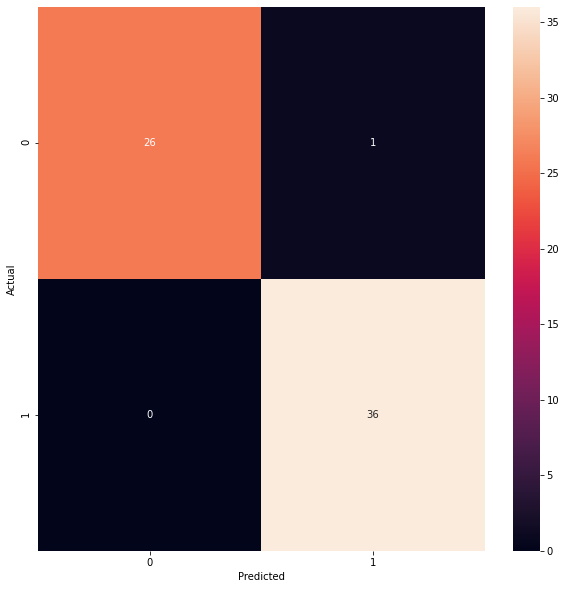

In [12]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Classtest,Class_model)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()